<h1 align="center"> Лабораторная работа №1</h1>
<h1 align="center"> Градиентный спуск первого порядка </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

<h2 align="center"> Функция Химмельблау </h2>

---

### Выполниили:
- **Бархоткина Анастасия 408226**
- **Лаврик Вадим 408969**
- **Юрков Кирилл 409936**

---

### Преподаватель:
- **Хитров Егор Германович**

---

### 2025 г.

---

### Цель:
Изучить и реализовать метод градиентного спуска для поиска точки минимума тестовой функции. Рассмотреть два варианта метода: с постоянным шагом и адаптивным шагом, зависящим от матрицы Гессе. Дополнительно реализовать ускоренный градиентный метод Нестерова.
    
### Задачи:
1. Реализовать классический градиентный спуск с фиксированным шагом.
2. Реализовать градиентный спуск с адаптивным шагом, рассчитанным на основе матрицы Гессе.
3. Реализовать ускоренный градиентный метод Нестерова.
4. Визуализировать процесс сходимости алгоритмов, построив графики изменения значения функции от итерации.
5. Проанализировать полученные результаты, сравнить скорость сходимости различных методов.

В нашей работе будем исследовать функцию Химмельблау. Она определена как: $ f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 $. Данная функция принадлежит классу гладких функций $ C^{\infty} $ и является многомодальной, то есть имеет несколько локальных минимумов, а именно: 
$$(3.0;2.0) \quad (-2.805;3.131) \quad (-3.779;-3.283) \quad (3.584;-1.848).$$
    
Подробнее рассмотрим метод градиентного спуска, который будет использован в работе. Это итерационный метод оптимизации, в котором мы движемся в направлении антиградиента функции:
    $$x_{k+1} = x_k - h_k \nabla f(x_k),$$
где $h_k$ - шаг матода, $\nabla f(x_k)$ - градиент функции, вычисленный в точке $x_k$.

Градиент функции определяется как вектор, составленный из частных производных по переменным x и y. Для нашей функции:
    $$\frac{\partial f}{\partial x} = 4x(x^2 + y - 11) + 2(x + y^2 - 7)$$
    $$\frac{\partial f}{\partial y} = 2(x^2 + y - 11) + 4y(x + y^2 - 7)$$
    

Импортируем нужные библиотеки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Начальной точкой для алгоритма спуска будет точка с координатами $(0.0,\;0.0)$

In [2]:
start = [0, 0]

Далее зададим нашу функцию:

In [3]:
def function_himmelblau(x, y):
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

Также опишем частные производные от этой функции:

In [4]:
def gradient(x, y):
    df_dx = 4 * x * (x ** 2 + y - 11) + 2 * (x + y ** 2 - 7)
    df_dy = 2 * (x ** 2 + y - 11) + 4 * y * (x + y ** 2 - 7)
    return np.array([df_dx, df_dy])

### Ход работы:
### **Задание 1.** Постоянный шаг

#### Спуск при помощи фиксированного шага

Примем шаг спуска равным $ h = 0.0005 $. Это середина заданного в работе интервала $0 < h < 0.001 $. 

In [5]:
h_fix = 0.0005

Алгоритм спуска с фиксированным шагом будет строить последовательность приближений к минимуму, на каждой итерации вычисляя градиент и обновляя точку по формуле градиентного спуска. Метод должен завершаться, когда точка становится достаточно близка к оптимальному решению. Это проверяется с помощью нормы градиента: 
$$
\|\nabla f(x_k)\|_2 = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 + \left(\frac{\partial f}{\partial y}\right)^2}
$$
Если $ \|\nabla f(x_k)\|_2 $ становится меньше порогового значения $\epsilon = 0.001$, алгоритм завершает работу.

In [6]:
def gradient_descent(start, h):
    point = np.array(start, dtype=float)
    path = [point.copy()]  
    for _ in range(10000):
        grad = gradient(point[0], point[1])
        if np.linalg.norm(grad) < 0.001:
            break
        point -= h * grad
        path.append(point.copy())  
    return point, np.array(path)

Теперь с помощью алгоритма найдём точку локального минимума.

In [7]:
min_point, path = gradient_descent(start, h_fix)
print(f"Найденный минимум: {np.round(min_point, 4)}")

Найденный минимум: [3. 2.]


**Найденная точка** равна $ (3.0, 2.0) $. Эта точка **соответствует заранее известным локальным минимумам** функции Химмельблау, благодаря чему делаем вывод, что алгоритм работает корректно.

Построим график функции Химмельблау.

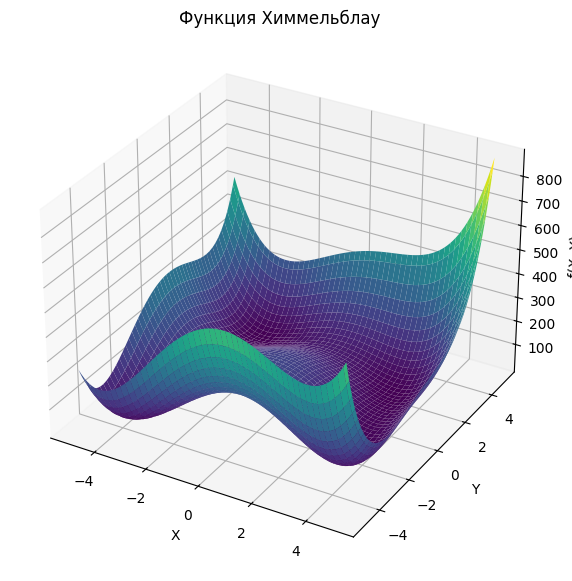

In [8]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = function_himmelblau(X, Y)
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Функция Химмельблау')
plt.show()

Также построим график высот, для наглядного отображения градиентного спуска с фиксированным шагом.

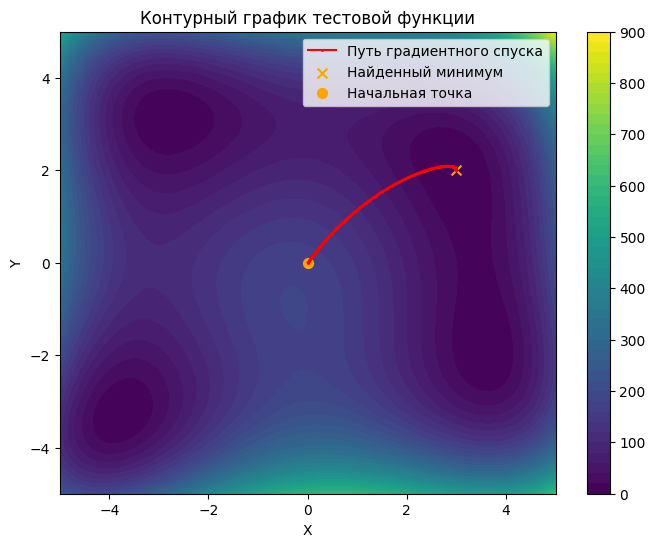

In [10]:
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Контурный график тестовой функции')
plt.plot(path[:, 0], path[:, 1], color='red', marker='o', markersize=1, label='Путь градиентного спуска')
plt.scatter(min_point[0], min_point[1], color='orange', marker='x', s=50, label='Найденный минимум')
plt.scatter(start[0], start[1], color='orange', marker='o', s=50, label='Начальная точка')
plt.legend()
plt.show()